In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from data.common import FEATURE_DESC, get_label_name_by_id
%matplotlib inline

# dataset parse and visualization
read record file and parse to the meaning items:
* if feature type is image then use `tf.image.decode_png` to decode
* if feature type is label，then case to int32 label id

the feature type defined in `common.py`
### read and parse the dataset

In [10]:
raw_dataset = tf.data.TFRecordDataset(['quick-draw-train.record'])
def parse_record(record):
    example = tf.io.parse_single_example(record, FEATURE_DESC)
    image_tensor = tf.image.decode_png(example['image/encoded'])
    image = tf.reshape(image_tensor, [256, 256])
    label = tf.cast(example['image/class/label'], tf.int32)
    return image, label

dataset = raw_dataset.map(parse_record, tf.data.AUTOTUNE)

The number of examples in dataset:

In [11]:
sum(1 for _ in dataset)

2021-10-06 20:30:35.000928: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-06 20:30:35.028819: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2699905000 Hz


68068

### visualize the dataset
lookup one example, change the skip param to visualize different item

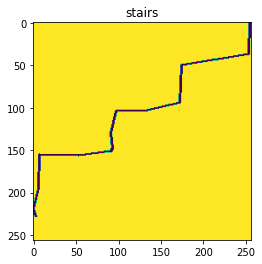

In [12]:
one_dataset = dataset.skip(10000).take(1)
for img, label_id in one_dataset:
    plt.title(get_label_name_by_id(label_id))
    plt.imshow(img)

# Do predict using the trainned keras model
Load the latest checkpoints model and predict the image bellow
### predicted image

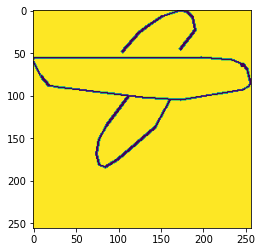

In [14]:
img = plt.imread('./res/airplane.png')
plt.imshow(img)

### load model and do predict

In [16]:
model = keras.models.load_model('./ckpt/ckpt-loss=1.42')
input_img = img.reshape(1, 256, 256, 1).astype(np.float32)
result = model.predict(input_img)

### print the result

In [17]:
idx = np.argmax(result[0])
print("class: {}({}) conf: {}".format(get_label_name_by_id(idx), idx, result[0][idx]))

class: light bulb(38) conf: 0.6292840242385864
